# Image Histogram Processing

![histogram of an image](dataset/imgs/histeq.png)

In this section you will see how to calculate and plot the histogram and cumulative histogram of an image using OpenCV in python. 

You can find more information in OpenCV documentation and tutorials.
[here](https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html)

Install and Import required packages necessary for image processing.

install required packages with python packages manager (PIP)
```cmd
pip install opencv-python
pip install matplotlib
pip install numpy
pip install scikit-image
```

In [33]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

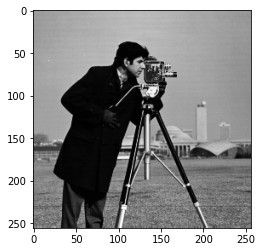

In [34]:
img = cv2.imread('dataset/cameraman.tif', 0)
plt.imshow(img, cmap='gray')

## 1-Histogram of an image

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

**images** : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".

**channels** : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.

**mask** : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. 

**histSize** : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].

**ranges** : this is our RANGE. Normally, it is [0,256].

Text(0, 0.5, 'Frequency')

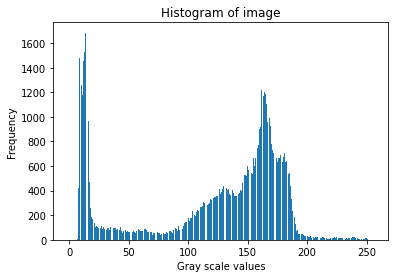

In [35]:
hist = cv2.calcHist(images=[img], channels=[0], mask=None, histSize=[256], ranges=[0, 255])

plt.bar(range(256), hist.ravel())
plt.title('Histogram of image')
plt.xlabel('Gray scale values')
plt.ylabel('Frequency')

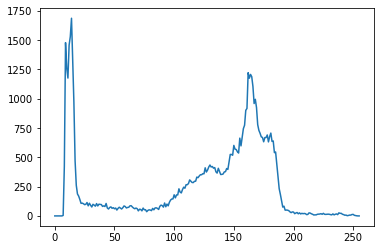

In [36]:
# Another method
hist,bins = np.histogram(img.ravel(),256,[0,256])
plt.plot(hist)

Let's look at another example.

In [37]:
# Let's read two other images
high = cv2.imread('dataset/hist_highkey.jpg')
low = cv2.imread('dataset/hist_lowkey.jpg')

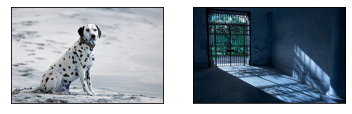

In [38]:
# show images
plt.subplot(121), plt.imshow(high)
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(low)
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.show()

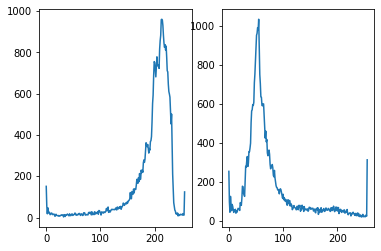

In [39]:
# Calculate histogram of both images for the last channel.
# Channels can differ from 0 to 2.
hist_high = cv2.calcHist([high],[2],None,[256],[0,256])
hist_low = cv2.calcHist([low],[2],None,[256],[0,256])

# Plot histograms
plt.subplot(121)
plt.plot(hist_high)

plt.subplot(122)
plt.plot(hist_low)

plt.show()

## 2-Cumulative histogram of an image

**Calculate cumulative distribution function (CDF) of an image**

The cumulative histogram of an image is produced by calculating the cumulative sum of that image's histogram. There is no specific function in OpenCV to obtain the CDF of an image; thus we use the cumsum function in Numpy. You can find more about the function [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html)


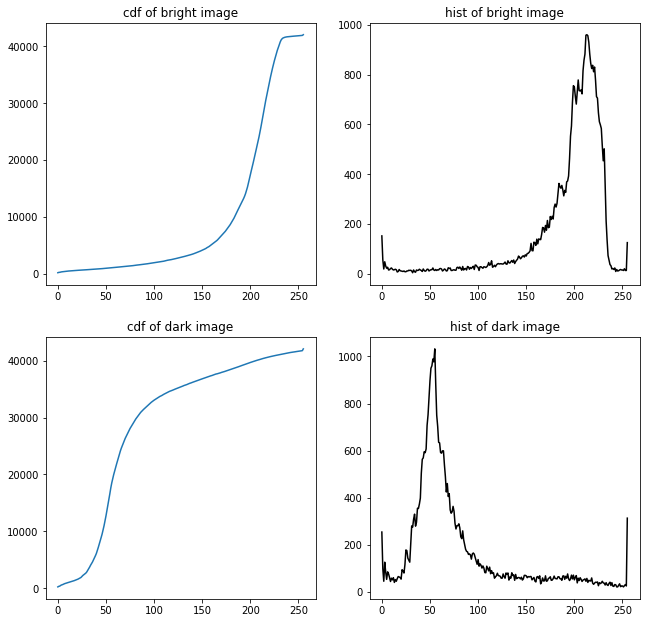

In [50]:
cdf_low = hist_low.cumsum()
cdf_high = hist_high.cumsum()

# plot cumulative histograms
plt.subplot(221), plt.plot(cdf_high), plt. title('cdf of bright image')
plt.subplot(222), plt.plot(hist_high, 'k'), plt. title('hist of bright image')

plt.subplot(223), plt.plot(cdf_low), plt. title('cdf of dark image')
plt.subplot(224), plt.plot(hist_low, 'k'), plt. title('hist of dark image')

# adjust the placement of subplots
plt.subplots_adjust(bottom=1, right=1.5, top=3)

plt.show()

## 3-Histogram manipulation

In order to continue image manipulation, first of all, we change the RGB images to grayscale using `cv2.cvtColor()`.



In [51]:
low_gray = cv2.cvtColor(low, cv2.COLOR_BGR2GRAY)
high_gray = cv2.cvtColor(high, cv2.COLOR_BGR2GRAY)

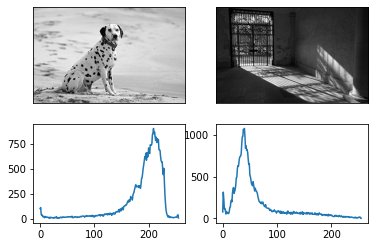

In [52]:
# show images and their histograms
plt.subplot(221), plt.imshow(high_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.plot(cv2.calcHist([high_gray],[0],None,[256],[0,256]))

plt.subplot(222), plt.imshow(low_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.plot(cv2.calcHist([low_gray],[0],None,[256],[0,256]))

plt.show()

# Histogram Processing
Histogram of an image can share valuable information with us.



## Thresholding

Thresholding is the simplest histogram processing application.

np.histogram : Another way to calculate the image histogram is with **numpy** library

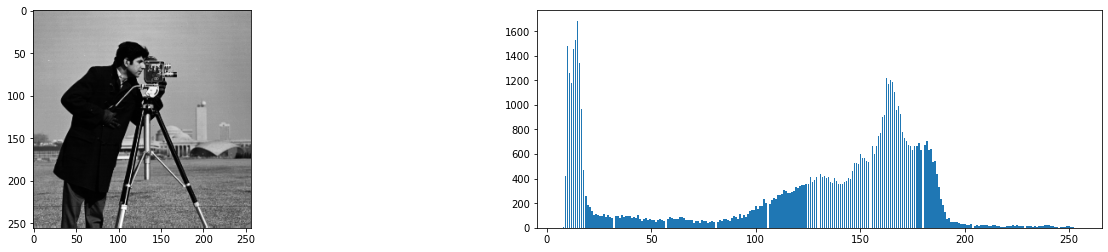

In [134]:
img = cv2.imread("dataset/cameraman.tif", 0)
img_hist = np.histogram(img, bins=256)

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.bar(img_hist[1][1:], img_hist[0])
plt.subplots_adjust(right=3)
plt.show()

### thresholded

```python
thresholded = img < t
plt.imshow(thresholded)
``` 

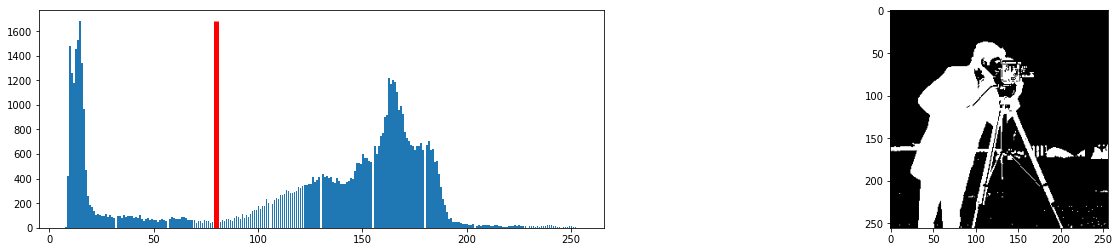

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
 False False False False False False False False False False  True  True
  True  True  True False  True  True False False False False  True False
 False False False False False False False False False False False False
 False  True False False False False False False False False False  True
  True  True  True  True  True False False False Fa

In [141]:
t = 80
thresholded = img < t

plt.subplot(121)
plt.bar(img_hist[1][1:], img_hist[0])
plt.vlines(t, 0, np.amax(img_hist[0]), colors='r', linewidth=5)
plt.subplot(122)
plt.imshow(thresholded, cmap="gray")
plt.subplots_adjust(right=3)
plt.show()

print(thresholded[150])